## PLOT AGE POLICIES 

Script to generate the Plot to show the outcomes of the Containment Policies for the four different countries. The code generates one plot for each country.   
Specifically, for each Scenario there are generated plots that report one of the two possible metrics: 
- Percentage of Infected Individuals
- Number of Deaths

The Plots are generated for each Senario (1 and 2) and for each possible fraction of sheltered individuals. Moreover, they are generated for each simulated fraction individuals engaged in targeted sheltering (50%, 75%, 100%).  

Each plot will depict the main outcomes for the selected metric. The horizontal axis will report the days since the sart date of infection (usually the time-range considered coincides with a 4months horizon). The vertical axis will instead report the evaluated metric (either percentage of infected or number of deaths).    
In each plot there will be visualized the curves corresponding to each of the five age-groups considered plus three baselines scenarios. The first baselin refers to the absence of intervention whereas the others refers to 50% or 100% of isolation for all age groups. They are then used for comparison. 

The analysis and interpretation of the plots allows to investigate the discrepancies in the effects of the policies implementation dictated mainly by age- and demographic- related features of the population. 

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
# Ensure type 1 fonts are used
mlp.rcParams['ps.useafm'] = True
mlp.rcParams['pdf.use14corefonts'] = True
mlp.rcParams['text.usetex'] = True
import seaborn as sns
import pandas as pd
import pickle
import itertools as it
import datetime
from datetime import date
import os

# define the target directory where to store the final plot 
target_dir = "./Plots/AgePolicies_Plots/"

### TABLE OF CONTENTS 
[1. Functions](#fn)    
[1.1 Percentage Infected Function](#inf_fn)    
[1.2 Total Deaths Function](#deaths_fn)    
[2. Italy](#ita)      
[3. Spain](#spa)   
[4. Germany](#ger)    
[5. France](#fra)    

## 1.  Functions 
<a id="fn"></a>

### 1.1 Percentage Infected Function
<a id="inf_fn"></a>

In [2]:
####### DEF FUNCTION TO PLOT PERC_INFECTED FOR ISOLATION AGE POLICIES
def perc_infected_age_group_policy(country,pop_size,dates,params_combo,fraction_sheltering,distance_bool = True,\
                                              n_sims=100, save_plot = True):
    
    # OVERALL SET UP 
    # For AGE GROUP POLICIES 
    color_list_shahin = ['orange','green','blue','purple','black']
    # For additional BASELINE POLICIES ALL 50% or 100% of the population isolated
    color_list_add = ['dodgerblue','hotpink']
    set_y = []
    
    # INITIALIZATION
    group_vec_age = ['0-14','15-29','30-49','50-69','70-100']
    d0 = dates[0]
    d_lockdown = dates[1]
    d_end = dates[2]
    t_lockdown_vec = []
    t_lockdown_vec.append((d_lockdown-d0).days)
    sim_end = int((d_end-d0).days)
    pop_size_name = str(pop_size)
    fraction_sheltering = str(fraction_sheltering)
    
    # EXTRACT THE BEST PARAMETERS COMBO FOR THE COUNTRY
    dmult = params_combo[0]
    p_inf = params_combo[1]
    d0 = params_combo[2]
    # SET THE .CSV FIXED FILE NAME TO BE USED 
    mild_name = '_p%s_m%s_s%s_mild.csv' %(p_inf,dmult,d0)
    severe_name = '_p%s_m%s_s%s_severe.csv'%(p_inf,dmult,d0)
    critical_name = '_p%s_m%s_s%s_critical.csv'%(p_inf,dmult,d0)
    recovered_name = '_p%s_m%s_s%s_recovered.csv'%(p_inf,dmult,d0)
    deaths_name = '_p%s_m%s_s%s_deaths.csv'%(p_inf,dmult,d0)

    # SET THE FOLDER NAMES AND DIRECTORIES
    # PATHS for BASELINE NO INTERVENTION
    base_filename = '%s_Baseline_All_0.0_n%s' %(country,pop_size_name)
    base_folder = "./age_policies/%s_baseline/" %country
    # PATHS for BASELINE 50% ALL AGES CONFINED
    base_filename1 = '%s_Baseline_All_0.5_n%s' %(country,pop_size_name)
    base_folder1 = "./age_policies/%s_baseline/" %country
    # PATHS for BASELINE 100% ALL AGES CONFINED 
    base_filename2 = '%s_Baseline_All_1.0_n%s' %(country,pop_size_name)
    base_folder2 = "./age_policies/%s_baseline/" %country
    if distance_bool == True:
        # PATHS for AGEPOLICIES
        filename = "%s_AgePolicy_"%(country)
        folder = "./age_policies/%s_yesdistance/" %country
        title = 'Yes Physical Distancing \n Salutary Sheltering Level: %s'%(str(int(float(fraction_sheltering)*100))+'\%')
        save_name = 'Infection_YesPhysicalDistancing_SalutarySheltering_{}_{}.jpg'.format(country,fraction_sheltering)
    elif distance_bool == False:
        # PATHS for AGEPOLICIES
        filename = "%s_AgePolicy_"%(country)
        folder = "./age_policies/%s_nodistance/" %country
        title = 'No Physical Distancing \n Salutary Sheltering Level: %s'%(str(int(float(fraction_sheltering)*100))+'\%')
        save_name = 'Infection_NoPhysicalDistancing_SalutarySheltering_{}_{}.jpg'.format(country,fraction_sheltering)
    
    ### BASELINE 0 -- NO ISOLATION 
    Infected_Trials = np.zeros((n_sims,sim_end+1)) # initialize the number of infected inividuals at each time step
    Mild = pd.read_csv(base_folder + base_filename + mild_name ,delimiter='	',header=None)
    Severe = pd.read_csv(base_folder + base_filename + severe_name,delimiter='	',header=None)
    Critical = pd.read_csv(base_folder + base_filename  + critical_name,delimiter='	',header=None)
    R = pd.read_csv(base_folder + base_filename + recovered_name,delimiter='	',header=None)
    D = pd.read_csv(base_folder + base_filename + deaths_name,delimiter='	',header=None)
    Infected_Trials[:,:] = Mild+Severe+Critical+R+D

    Infected_Trials = Infected_Trials.mean(axis=0) # compute the mean of the infected number of indiviudals 
    Infected_Trials = Infected_Trials/pop_size*100 # compute the percentage of infected
    set_y.append(Infected_Trials[:].max())

    print("Baseline 0: No intervention")
    print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]].round(0))
    #print("% infected today: ", Infected_Trials[today])
    print("% infected at the end of the simulation: ", Infected_Trials[sim_end].round(0))
    Infection_TOT = Infected_Trials[sim_end]
    #plt.figure(figsize= (7,6.8))
    plt.plot(Infected_Trials,color='gray',linestyle='-.')

    #### BASELINE 1 -- ALL POPULATION ISOLATED BY 0.5
    Infected_Trials = np.zeros((n_sims,sim_end+1))
    Mild = pd.read_csv(base_folder1 + base_filename1 + mild_name ,delimiter='	',header=None)
    Severe = pd.read_csv(base_folder1 + base_filename1+ severe_name,delimiter='	',header=None)
    Critical = pd.read_csv(base_folder1 + base_filename1  + critical_name ,delimiter='	',header=None)
    R = pd.read_csv(base_folder1 + base_filename1 + recovered_name,delimiter='	',header=None)
    D = pd.read_csv(base_folder1 + base_filename1 + deaths_name,delimiter='	',header=None)
    Infected_Trials[:,:] = Mild+Severe+Critical+R+D
    
    Infected_Trials = Infected_Trials.mean(axis=0)
    Infected_Trials = Infected_Trials/pop_size*100
    set_y.append(Infected_Trials[:].max())

    print("Baseline 1: All Population Isolated by 0.5")
    print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]].round(0))
    #print("% infected today: ", Infected_Trials[today])
    print("% infected at the end of the simulation: ", Infected_Trials[sim_end].round(0))
    print("Variation in percentage of infected after intervention: ", (((Infected_Trials[sim_end]-Infection_TOT)/Infection_TOT)*100).round(1))
    plt.plot(Infected_Trials,color=color_list_add[0],linestyle='-.')

    #### BASELINE 2 -- ALL POPULATION ISOLATED BY 1
    Infected_Trials = np.zeros((n_sims,sim_end+1))
    Mild = pd.read_csv(base_folder2 + base_filename2 +  mild_name, delimiter='	',header=None)
    Severe = pd.read_csv(base_folder2 + base_filename2 + severe_name,delimiter='	',header=None)
    Critical = pd.read_csv(base_folder2 + base_filename2  + critical_name,delimiter='	',header=None)
    R = pd.read_csv(base_folder2 + base_filename2 + recovered_name,delimiter='	',header=None)
    D = pd.read_csv(base_folder2 + base_filename2 + deaths_name,delimiter='	',header=None)
    Infected_Trials[:,:] = Mild+Severe+Critical+R+D

    Infected_Trials = Infected_Trials.mean(axis=0)
    Infected_Trials = Infected_Trials/pop_size*100
    set_y.append(Infected_Trials[:].max())

    print("Baseline 2: All Population Isolated by 1")
    print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]].round(0))
    #print("% infected today: ", Infected_Trials[today])
    print("% infected at the end of the simulation: ", Infected_Trials[sim_end].round(0))
    print("Variation in percentage of infected after intervention: ", (((Infected_Trials[sim_end]-Infection_TOT)/Infection_TOT)*100).round(1))
    plt.plot(Infected_Trials,color=color_list_add[1],linestyle='-.')
    
    ##### AGE POLICIES
    nb = 0
    for j in group_vec_age:
        nb +=1
        Infected_Trials = np.zeros((n_sims,sim_end+1))
        Mild = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + mild_name ,delimiter='	',header=None)
        Severe = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + severe_name,delimiter='	',header=None)
        Critical = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + critical_name,delimiter='	',header=None)
        R = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + recovered_name,delimiter='	',header=None)
        D = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + deaths_name,delimiter='	',header=None)
        Infected_Trials[:,:] = Mild+Severe+Critical+R+D 

        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.
        set_y.append(Infected_Trials[:].max())

        print("Age group: ", group_vec_age[nb-1])
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]].round(0))
        #print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end].round(0))
        print("Variation in percentage of infected after intervention: ", (((Infected_Trials[sim_end]-Infection_TOT)/Infection_TOT)*100).round(1))
        #print(t_lockdown_vec[0])
        plt.plot(Infected_Trials,color=color_list_shahin[nb-1])
   
    plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--',alpha = 0.6,lw=0.8)
    plt.legend(['Absence of\n intervention']+['All ages\n50\% confined','All ages\n100\% confined']+['Ages' + str(group_vec_age[i]) for i in range(len(group_vec_age))], fontsize = 11)
    plt.ylim(0,1.05*max(set_y))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=15)
    
    plt.ylabel('Percentage of infected', fontsize=15)
    plt.xlabel('Days since patient zero', fontsize=15)
    #plt.show()
    if save_plot == True:
        plt.tight_layout()
        plt.savefig(os.path.join(target_dir,country,save_name),dpi=100)
        #plt.show()
    else:
        plt.show()
    return (plt)

### 1.2 Total Deaths Function
<a id="deaths_fn"></a>

In [3]:
####### DEF FUNCTION TO PLOT DEATHS FOR ISOLATION AGE POLICIES
def deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = True,\
                                              n_sims=100, save_plot = True):
    
    # OVERALL SET UP 
    # For AGE GROUP POLICIES 
    color_list_shahin = ['orange','green','blue','purple','black']
    # For additional BASELINE POLICIES ALL 50% or 100% of the population isolated
    color_list_add = ['dodgerblue','hotpink']
    set_y = []
    
    # INITIALIZATION
    group_vec_age = ['0-14','15-29','30-49','50-69','70-100']
    d0 = dates[0]
    d_lockdown = dates[1]
    d_end = dates[2]
    t_lockdown_vec = []
    t_lockdown_vec.append((d_lockdown-d0).days)
    sim_end = int((d_end-d0).days)
    pop_size_name = str(pop_size)
    fraction_sheltering = str(fraction_sheltering)
    
    # EXTRACT THE BEST PARAMETERS COMBO FOR THE COUNTRY
    dmult = params_combo[0]
    p_inf = params_combo[1]
    d0 = params_combo[2]
    # SET THE .CSV FIXED FILE NAME TO BE USED 
    mild_name = '_p%s_m%s_s%s_mild.csv' %(p_inf,dmult,d0)
    severe_name = '_p%s_m%s_s%s_severe.csv'%(p_inf,dmult,d0)
    critical_name = '_p%s_m%s_s%s_critical.csv'%(p_inf,dmult,d0)
    recovered_name = '_p%s_m%s_s%s_recovered.csv'%(p_inf,dmult,d0)
    deaths_name = '_p%s_m%s_s%s_deaths.csv'%(p_inf,dmult,d0)
    
    # SET THE FOLDER NAMES AND DIRECTORIES
    # PATHS for BASELINE NO INTERVENTION
    base_filename = '%s_Baseline_All_0.0_n%s' %(country,pop_size_name)
    base_folder = "./age_policies/%s_baseline/" %country
    # PATHS for BASELINE 50% ALL AGES CONFINED
    base_filename1 = '%s_Baseline_All_0.5_n%s' %(country,pop_size_name)
    base_folder1 = "./age_policies/%s_baseline/" %country
    # PATHS for BASELINE 100% ALL AGES CONFINED 
    base_filename2 = '%s_Baseline_All_1.0_n%s' %(country,pop_size_name)
    base_folder2 = "./age_policies/%s_baseline/" %country
    if distance_bool == True:
        # PATHS for AGEPOLICIES
        filename = "%s_AgePolicy_"%(country)
        folder = "./age_policies/%s_yesdistance/" %country
        title = 'Yes Physical Distancing \n Salutary Sheltering Level: %s'%(str(int(float(fraction_sheltering)*100))+'\%')
        save_name = 'Deaths_YesPhysicalDistancing_SalutarySheltering_{}_{}.jpg'.format(country,fraction_sheltering)
    elif distance_bool == False:
        # PATHS for AGEPOLICIES
        filename = "%s_AgePolicy_"%(country)
        folder = "./age_policies/%s_nodistance/" %country
        title = 'No Physical Distancing \n Salutary Sheltering Level: %s'%(str(int(float(fraction_sheltering)*100))+'\%')
        save_name = 'Deaths_NoPhysicalDistancing_SalutarySheltering_{}_{}.jpg'.format(country,fraction_sheltering)
    print(folder)
    ### BASELINE 0 -- NO ISOLATION 
    D=np.zeros((n_sims,sim_end+1))

    Deaths = pd.read_csv(base_folder + base_filename + deaths_name, delimiter='	',header=None)
    D[:,:]=(Deaths/pop_size)*100000. 
    D = D.mean(axis=0)
    set_y.append(D[:].max())
    print("Baseline 0: No intervention")                        
    print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]].round(0))
    #print("# of deaths today: ", D[today])
    print("# of deaths at the end of the simulation: ", D[sim_end].round(0))  
    Deaths_TOT = D[sim_end]
    plt.plot(D,color='gray',linestyle='-.')

    #### BASELINE 1 -- ALL POPULATION ISOLATED BY 0.5
    D=np.zeros((n_sims,sim_end+1))
    Deaths = pd.read_csv(base_folder1 + base_filename1 + deaths_name, delimiter='	',header=None)
    D[:,:]=(Deaths/pop_size)*100000. 
    D = D.mean(axis=0)
    set_y.append(D[:].max())
    
    print("Baseline 1: All Population Isolated by 0.5")
    print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]].round(0))
    #print("# of deaths today: ", D[today])
    print("# of deaths at the end of the simulation: ", D[sim_end].round(0))
    print("Variation in deaths after intervention: ", (((D[sim_end]-Deaths_TOT)/Deaths_TOT)*100).round(1))
    
    plt.plot(D,color=color_list_add[0],linestyle='-.')

    #### BASELINE 2 -- ALL POPULATION ISOLATED BY 1
    D=np.zeros((n_sims,sim_end+1))
    Deaths = pd.read_csv(base_folder2 + base_filename2 + deaths_name, delimiter='	',header=None)
    D[:,:]=(Deaths/pop_size)*100000.
    D = D.mean(axis=0)
    set_y.append(D[:].max())

    print("Baseline 2: All Population Isolated by 1")
    print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]].round(0))
    #print("# of deaths today: ", D[today])
    print("# of deaths at the end of the simulation: ", D[sim_end].round(0))
    print("Variation in deaths after intervention: ", (((D[sim_end]-Deaths_TOT)/Deaths_TOT)*100).round(1))
    
    plt.plot(D,color=color_list_add[1],linestyle='-.')

    ##### AGE POLICIES 
    nb = 0
    for j in group_vec_age:
        nb +=1
        D=np.zeros((n_sims,sim_end+1))
        Deaths = pd.read_csv(folder + filename + fraction_sheltering + "_" + j + "_n%s"%pop_size_name + deaths_name,delimiter='	',header=None)
        D[:,:]=(Deaths/pop_size)*100000. 
        D = D.mean(axis=0)
        set_y.append(D[:].max())

        print("Age group: ", group_vec_age[nb-1])
        print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]].round(0))
        #print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", D[sim_end].round(0))
        print("Variation in deaths after intervention: ", (((D[sim_end]-Deaths_TOT)/Deaths_TOT)*100).round(1))
        #print(t_lockdown_vec[0])
        plt.plot(D,color=color_list_shahin[nb-1])

    plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--',alpha = 0.6,lw=0.8)
    plt.legend(['Absence of\n intervention']+['All ages\n50\% confined','All ages\n100\% confined']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))], fontsize = 11)
    plt.ylim(0,1.05*max(set_y))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title,fontsize=15)
    plt.ylabel('Total deaths (per 100k individuals)', fontsize=15)
    plt.xlabel('Days since patient zero', fontsize=15)
    #plt.show()
    if save_plot == True:
        plt.tight_layout()
        plt.savefig(os.path.join(target_dir,country,save_name),dpi=100)
        #plt.show()
    else:
        plt.show()
    return (plt)

## 2.  Italy 
<a id="ita"></a>

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  71.0
Variation in percentage of infected after intervention:  -8.0
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  67.0
Variation in percentage of infected after intervention:  -12.8
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  61.0
Variation in percentage of infected after intervention:  -20.3
Age group:  50-69
% infected on lockdown d

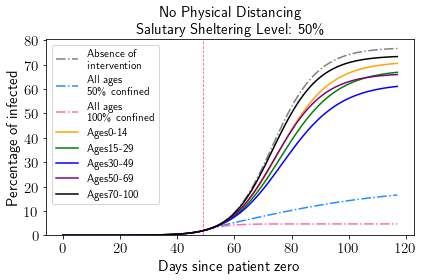

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  68.0
Variation in percentage of infected after intervention:  -11.9
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  62.0
Variation in percentage of infected after intervention:  -19.7
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  53.0
Variation in percentage of infected after intervention:  -31.2
Age group:  50-69
% infected on lockdow

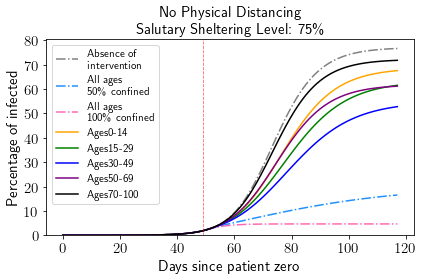

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  65.0
Variation in percentage of infected after intervention:  -15.5
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  57.0
Variation in percentage of infected after intervention:  -26.1
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  45.0
Variation in percentage of infected after intervention:  -41.2
Age group:  50-69
% infected on lockdow

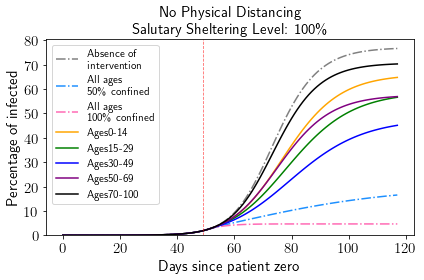

In [4]:
## NUMBER OF INFECTED INDIVIDUALS -- NO PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Italy'
    pop_size = 500000.0
    params_combo = (1.0,0.019,19)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,19),date(2020,3,8),date(2020, 5, 15)) #d0, d_lockdown, d_end
    save_plot = True
    distance_bool = False                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  27.0
Variation in percentage of infected after intervention:  -65.2
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  23.0
Variation in percentage of infected after intervention:  -69.5
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  21.0
Variation in percentage of infected after intervention:  -72.5
Age group:  50-69
% infected on lockdown 

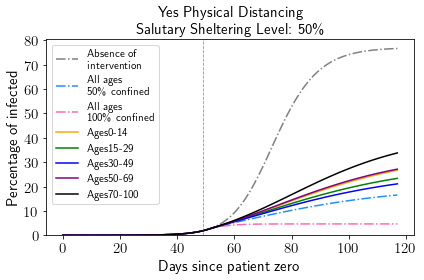

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  24.0
Variation in percentage of infected after intervention:  -69.3
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  19.0
Variation in percentage of infected after intervention:  -74.6
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.4
Age group:  50-69
% infected on lockdown 

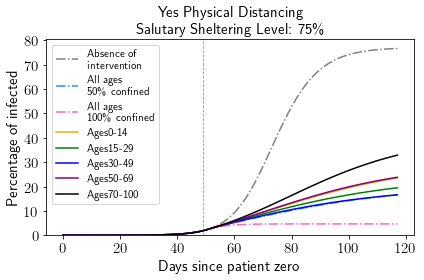

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  77.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -94.0
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  21.0
Variation in percentage of infected after intervention:  -72.3
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -78.1
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -82.3
Age group:  50-69
% infected on lockdown 

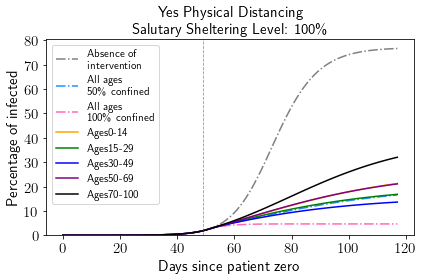

In [5]:
## NUMBER OF INFECTED INDIVIDUALS -- YES PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Italy'
    pop_size = 500000.0
    params_combo = (1.0,0.019,19)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,19),date(2020,3,8),date(2020, 5, 15))
    save_plot = True
    distance_bool = True                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()

./age_policies/Italy_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  617.0
Variation in deaths after intervention:  -9.5
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  579.0
Variation in deaths after intervention:  -15.2
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  540.0
Variation in deaths after intervention:  -20.8
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the 

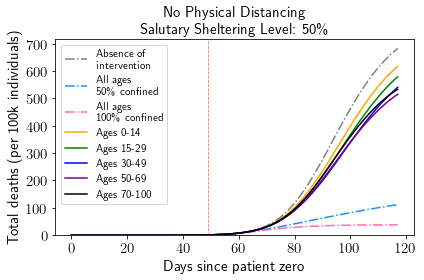

./age_policies/Italy_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  591.0
Variation in deaths after intervention:  -13.4
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  526.0
Variation in deaths after intervention:  -22.9
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  468.0
Variation in deaths after intervention:  -31.4
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the

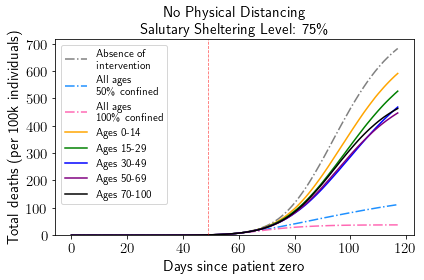

./age_policies/Italy_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  564.0
Variation in deaths after intervention:  -17.3
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  482.0
Variation in deaths after intervention:  -29.3
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  402.0
Variation in deaths after intervention:  -41.1
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the

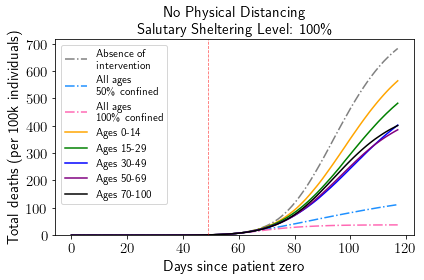

In [6]:
## NUMBER OF DEATHS INDIVIDUALS -- NO PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Italy'
    pop_size = 500000.0
    params_combo = (1.0,0.019,19)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,19),date(2020,3,8),date(2020, 5, 15))
    save_plot = True
    distance_bool = False

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

./age_policies/Italy_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  180.0
Variation in deaths after intervention:  -73.6
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  161.0
Variation in deaths after intervention:  -76.4
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  152.0
Variation in deaths after intervention:  -77.7
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at th

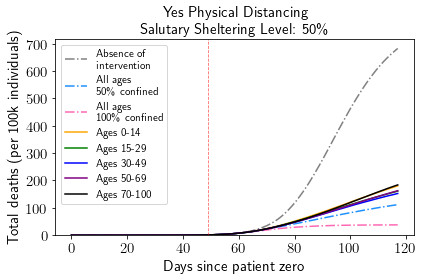

./age_policies/Italy_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  164.0
Variation in deaths after intervention:  -76.0
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  140.0
Variation in deaths after intervention:  -79.4
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  130.0
Variation in deaths after intervention:  -80.9
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at th

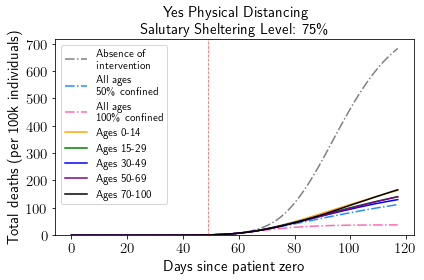

./age_policies/Italy_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  682.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.6
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -94.5
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  151.0
Variation in deaths after intervention:  -77.8
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  125.0
Variation in deaths after intervention:  -81.6
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  112.0
Variation in deaths after intervention:  -83.5
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at th

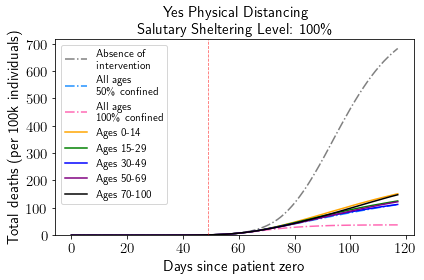

In [7]:
## NUMBER OF DEATHS INDIVIDUALS -- YES PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Italy'
    pop_size = 500000.0
    params_combo = (1.0,0.019,19)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,19),date(2020,3,8),date(2020, 5, 15))
    save_plot = True
    distance_bool = True

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

## 3.  Spain
<a id="spa"></a>

Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  66.0
Variation in percentage of infected after intervention:  -10.9
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  61.0
Variation in percentage of infected after intervention:  -17.2
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  51.0
Variation in percentage of infected after intervention:  -30.8
Age group:  50-69
% infected on lockdown d

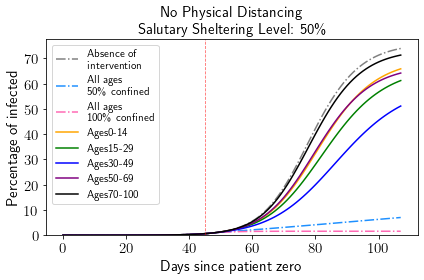

 
Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  62.0
Variation in percentage of infected after intervention:  -16.1
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  54.0
Variation in percentage of infected after intervention:  -26.7
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  38.0
Variation in percentage of infected after intervention:  -49.1
Age group:  50-69
% infected on lockdown

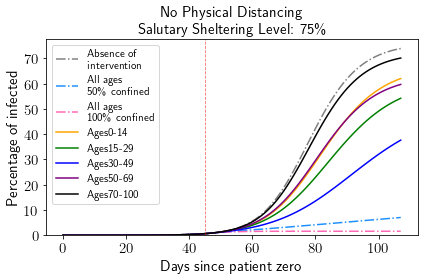

 
Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  59.0
Variation in percentage of infected after intervention:  -20.8
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  48.0
Variation in percentage of infected after intervention:  -35.5
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  26.0
Variation in percentage of infected after intervention:  -64.9
Age group:  50-69
% infected on lockdown

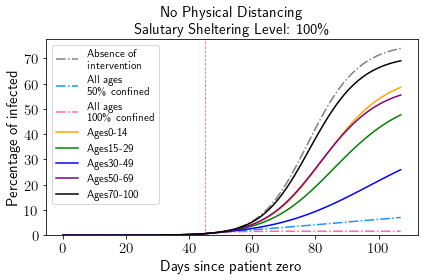

In [8]:
## NUMBER OF INFECTED INDIVIDUALS -- NO PHISICAL DISTANCING -- SPAIN
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Spain'
    pop_size = 500000.0
    params_combo = (3.0,0.022,29)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,29),date(2020,3,14),date(2020, 5, 15))
    save_plot = True
    distance_bool = False                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  13.0
Variation in percentage of infected after intervention:  -82.8
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  11.0
Variation in percentage of infected after intervention:  -85.3
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  8.0
Variation in percentage of infected after intervention:  -89.4
Age group:  50-69
% infected on lockdown da

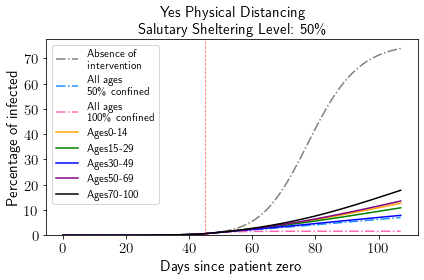

 
Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  11.0
Variation in percentage of infected after intervention:  -85.4
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  9.0
Variation in percentage of infected after intervention:  -88.3
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -92.6
Age group:  50-69
% infected on lockdown d

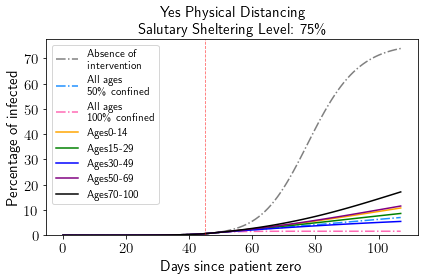

 
Baseline 0: No intervention
% infected on lockdown day:  1.0
% infected at the end of the simulation:  74.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  1.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -97.9
Age group:  0-14
% infected on lockdown day:  1.0
% infected at the end of the simulation:  9.0
Variation in percentage of infected after intervention:  -87.2
Age group:  15-29
% infected on lockdown day:  1.0
% infected at the end of the simulation:  7.0
Variation in percentage of infected after intervention:  -90.5
Age group:  30-49
% infected on lockdown day:  1.0
% infected at the end of the simulation:  4.0
Variation in percentage of infected after intervention:  -94.5
Age group:  50-69
% infected on lockdown da

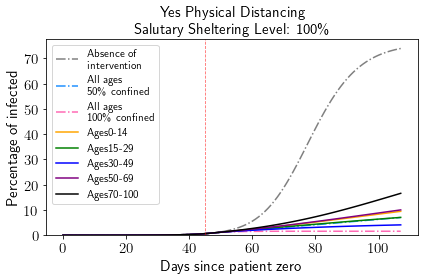

In [9]:
## NUMBER OF INFECTED INDIVIDUALS -- YES PHISICAL DISTANCING -- SPAIN
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Spain'
    pop_size = 500000.0
    params_combo = (3.0,0.022,29)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,29),date(2020,3,14),date(2020, 5, 15))
    save_plot = True
    distance_bool = True                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

./age_policies/Spain_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1346.0
Variation in deaths after intervention:  -15.2
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1186.0
Variation in deaths after intervention:  -25.3
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  947.0
Variation in deaths after intervention:  -40.4
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at 

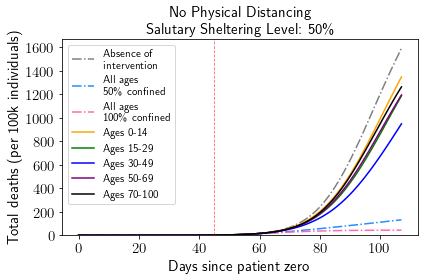

./age_policies/Spain_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1243.0
Variation in deaths after intervention:  -21.7
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1008.0
Variation in deaths after intervention:  -36.5
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  682.0
Variation in deaths after intervention:  -57.1
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at 

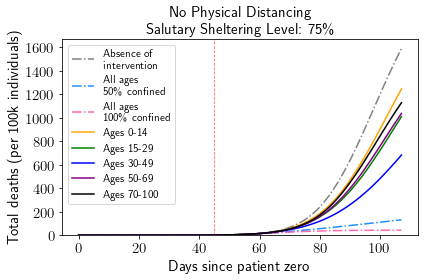

./age_policies/Spain_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1155.0
Variation in deaths after intervention:  -27.2
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  863.0
Variation in deaths after intervention:  -45.6
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  485.0
Variation in deaths after intervention:  -69.5
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at t

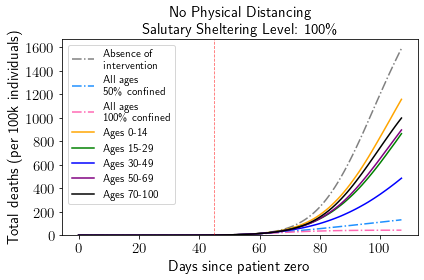

In [10]:
## NUMBER OF DEATHS INDIVIDUALS -- NO PHISICAL DISTANCING -- SPAIN
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Spain'
    pop_size = 500000.0
    params_combo = (3.0,0.022,29)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,29),date(2020,3,14),date(2020, 5, 15))
    save_plot = True
    distance_bool = False

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

./age_policies/Spain_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  223.0
Variation in deaths after intervention:  -86.0
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  195.0
Variation in deaths after intervention:  -87.7
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  165.0
Variation in deaths after intervention:  -89.6
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at t

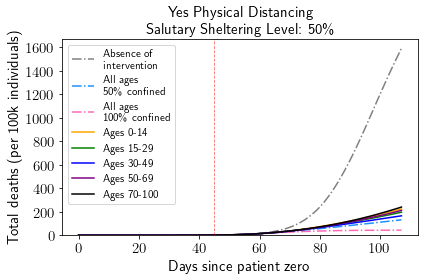

./age_policies/Spain_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  200.0
Variation in deaths after intervention:  -87.4
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  165.0
Variation in deaths after intervention:  -89.6
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at t

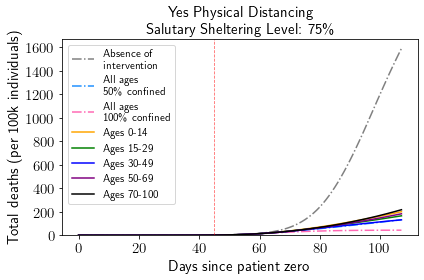

./age_policies/Spain_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  1588.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  131.0
Variation in deaths after intervention:  -91.7
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  43.0
Variation in deaths after intervention:  -97.3
Age group:  0-14
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  184.0
Variation in deaths after intervention:  -88.4
Age group:  15-29
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  144.0
Variation in deaths after intervention:  -90.9
Age group:  30-49
# of deaths on lockdown day:  2.0
# of deaths at the end of the simulation:  108.0
Variation in deaths after intervention:  -93.2
Age group:  50-69
# of deaths on lockdown day:  2.0
# of deaths at t

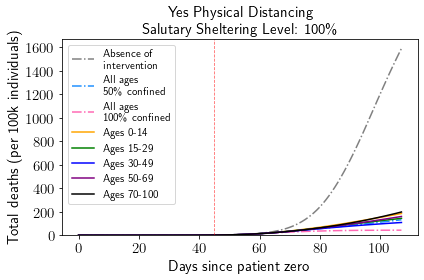

In [11]:
## NUMBER OF DEATHS INDIVIDUALS -- YES PHISICAL DISTANCING -- SPAIN
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Spain'
    pop_size = 500000.0
    params_combo = (3.0,0.022,29)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,29),date(2020,3,14),date(2020, 5, 15))
    save_plot = True
    distance_bool = True

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

## 4.  Germany
<a id="ger"></a>

Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  32.0
Variation in percentage of infected after intervention:  -20.9
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  21.0
Variation in percentage of infected after intervention:  -48.0
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -58.3
Age group:  50-69
% infected on lockdown d

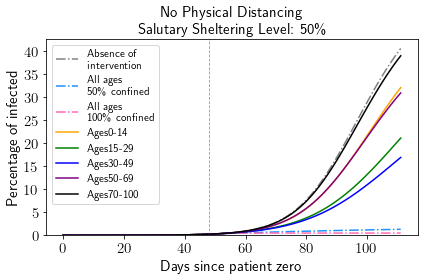

 
Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  29.0
Variation in percentage of infected after intervention:  -29.7
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -65.7
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  10.0
Variation in percentage of infected after intervention:  -75.4
Age group:  50-69
% infected on lockdown

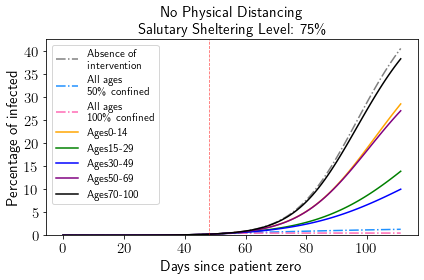

 
Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  26.0
Variation in percentage of infected after intervention:  -36.5
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  9.0
Variation in percentage of infected after intervention:  -77.1
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  6.0
Variation in percentage of infected after intervention:  -85.3
Age group:  50-69
% infected on lockdown d

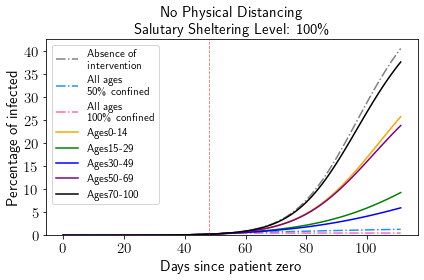

In [12]:
## NUMBER OF INFECTED INDIVIDUALS -- NO PHISICAL DISTANCING -- GERMANY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Germany'
    pop_size = 500000.0
    params_combo = (0.8,0.031,25)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,25),date(2020, 3, 13),date(2020, 5, 15))
    save_plot = True
    distance_bool = False                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -94.4
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -96.2
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.4
Age group:  50-69
% infected on lockdown day:

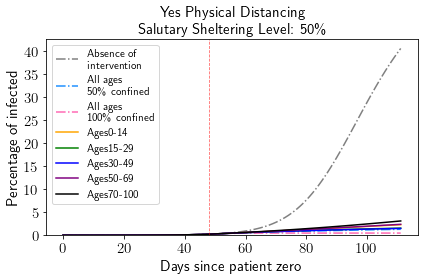

 
Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -95.0
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -97.0
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -97.3
Age group:  50-69
% infected on lockdown da

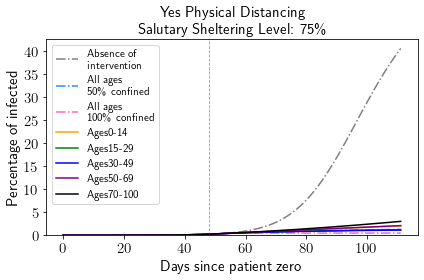

 
Baseline 0: No intervention
% infected on lockdown day:  0.0
% infected at the end of the simulation:  41.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -96.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  0.0
% infected at the end of the simulation:  0.0
Variation in percentage of infected after intervention:  -98.8
Age group:  0-14
% infected on lockdown day:  0.0
% infected at the end of the simulation:  2.0
Variation in percentage of infected after intervention:  -95.6
Age group:  15-29
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -97.5
Age group:  30-49
% infected on lockdown day:  0.0
% infected at the end of the simulation:  1.0
Variation in percentage of infected after intervention:  -97.7
Age group:  50-69
% infected on lockdown da

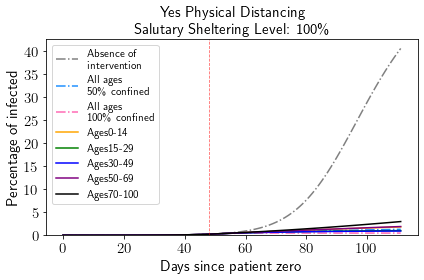

In [13]:
## NUMBER OF INFECTED INDIVIDUALS -- YES PHISICAL DISTANCING -- GERMANY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Germany'
    pop_size = 500000.0
    params_combo = (0.8,0.031,25)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,25),date(2020, 3, 13),date(2020, 5, 15))
    save_plot = True
    distance_bool = True                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

./age_policies/Germany_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  107.0
Variation in deaths after intervention:  -24.0
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  66.0
Variation in deaths after intervention:  -52.9
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  58.0
Variation in deaths after intervention:  -58.3
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the en

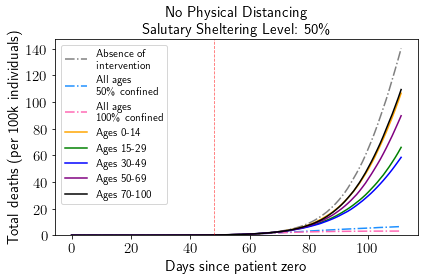

./age_policies/Germany_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  94.0
Variation in deaths after intervention:  -32.6
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  47.0
Variation in deaths after intervention:  -66.5
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  38.0
Variation in deaths after intervention:  -72.7
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the end

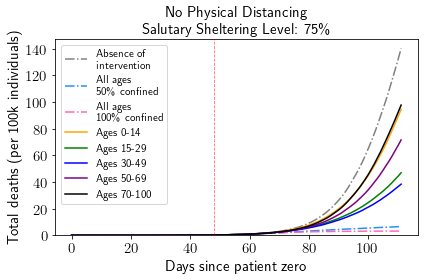

./age_policies/Germany_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  85.0
Variation in deaths after intervention:  -39.2
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  34.0
Variation in deaths after intervention:  -75.4
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -81.4
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the end

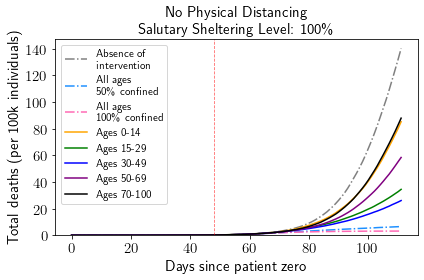

In [14]:
## NUMBER OF DEATHS INDIVIDUALS -- NO PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Germany'
    pop_size = 500000.0
    params_combo = (0.8,0.031,25)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,25),date(2020, 3, 13),date(2020, 5, 15))
    save_plot = True
    distance_bool = False

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

./age_policies/Germany_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  11.0
Variation in deaths after intervention:  -92.4
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  8.0
Variation in deaths after intervention:  -94.1
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  8.0
Variation in deaths after intervention:  -94.1
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the end 

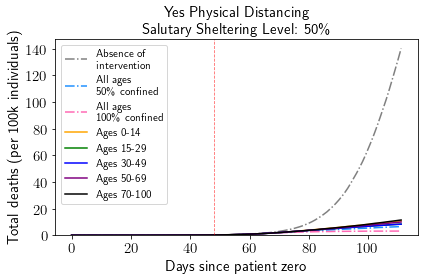

./age_policies/Germany_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  10.0
Variation in deaths after intervention:  -92.8
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -94.8
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.0
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the end 

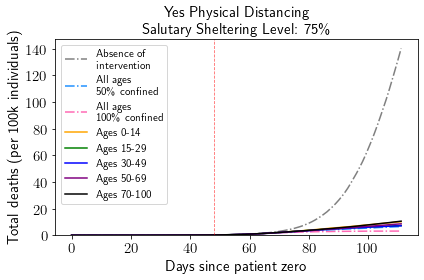

./age_policies/Germany_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  140.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  7.0
Variation in deaths after intervention:  -95.3
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  3.0
Variation in deaths after intervention:  -97.8
Age group:  0-14
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  9.0
Variation in deaths after intervention:  -93.3
Age group:  15-29
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  6.0
Variation in deaths after intervention:  -95.4
Age group:  30-49
# of deaths on lockdown day:  0.0
# of deaths at the end of the simulation:  6.0
Variation in deaths after intervention:  -95.7
Age group:  50-69
# of deaths on lockdown day:  0.0
# of deaths at the end o

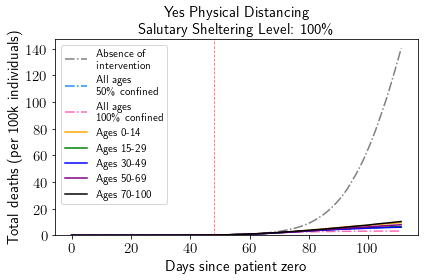

In [15]:
## NUMBER OF DEATHS INDIVIDUALS -- YES PHISICAL DISTANCING -- ITALY
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'Germany'
    pop_size = 500000.0
    params_combo = (0.8,0.031,25)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,25),date(2020, 3, 13),date(2020, 5, 15))
    save_plot = True
    distance_bool = True

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

## 5.  France
<a id="fra"></a>

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  62.0
Variation in percentage of infected after intervention:  -11.2
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  60.0
Variation in percentage of infected after intervention:  -13.9
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  51.0
Variation in percentage of infected after intervention:  -26.8
Age group:  50-69
% infected on lockdown 

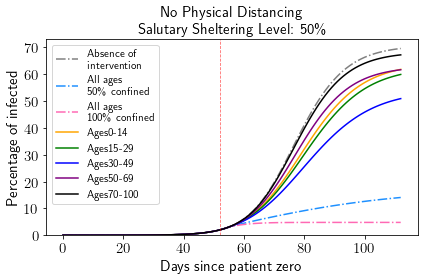

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  58.0
Variation in percentage of infected after intervention:  -16.8
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  55.0
Variation in percentage of infected after intervention:  -21.4
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  42.0
Variation in percentage of infected after intervention:  -40.1
Age group:  50-69
% infected on lockdow

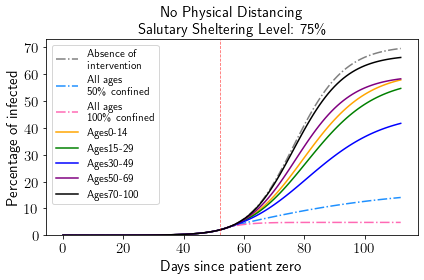

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  54.0
Variation in percentage of infected after intervention:  -21.9
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  50.0
Variation in percentage of infected after intervention:  -28.6
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  34.0
Variation in percentage of infected after intervention:  -51.4
Age group:  50-69
% infected on lockdow

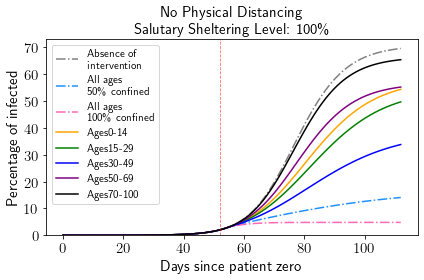

In [16]:
## NUMBER OF INFECTED INDIVIDUALS -- NO PHISICAL DISTANCING -- FRANCE
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'France'
    pop_size = 500000.0
    params_combo = (0.8,0.022,24)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,24),date(2020,3,16),date(2020, 5, 15))
    save_plot = True
    distance_bool = False                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  20.0
Variation in percentage of infected after intervention:  -70.7
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  19.0
Variation in percentage of infected after intervention:  -72.0
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -76.0
Age group:  50-69
% infected on lockdown 

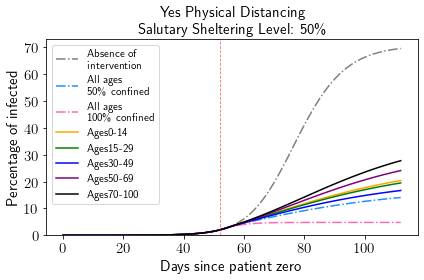

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  18.0
Variation in percentage of infected after intervention:  -74.5
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  17.0
Variation in percentage of infected after intervention:  -76.2
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  13.0
Variation in percentage of infected after intervention:  -81.0
Age group:  50-69
% infected on lockdow

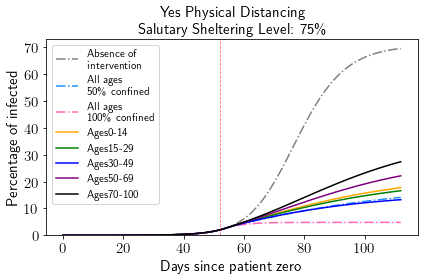

 
Baseline 0: No intervention
% infected on lockdown day:  2.0
% infected at the end of the simulation:  70.0
Baseline 1: All Population Isolated by 0.5
% infected on lockdown day:  2.0
% infected at the end of the simulation:  14.0
Variation in percentage of infected after intervention:  -79.8
Baseline 2: All Population Isolated by 1
% infected on lockdown day:  2.0
% infected at the end of the simulation:  5.0
Variation in percentage of infected after intervention:  -93.1
Age group:  0-14
% infected on lockdown day:  2.0
% infected at the end of the simulation:  16.0
Variation in percentage of infected after intervention:  -77.2
Age group:  15-29
% infected on lockdown day:  2.0
% infected at the end of the simulation:  15.0
Variation in percentage of infected after intervention:  -79.1
Age group:  30-49
% infected on lockdown day:  2.0
% infected at the end of the simulation:  11.0
Variation in percentage of infected after intervention:  -84.2
Age group:  50-69
% infected on lockdow

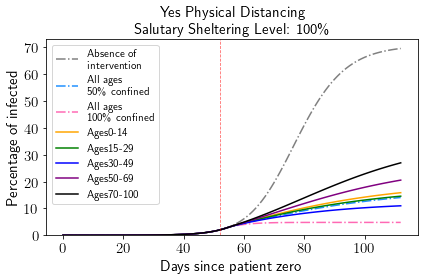

In [17]:
## NUMBER OF INFECTED INDIVIDUALS -- YES PHISICAL DISTANCING -- FRANCE
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'France'
    pop_size = 500000.0
    params_combo = (0.8,0.022,24)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,24),date(2020,3,16),date(2020, 5, 15))
    save_plot = True
    distance_bool = True                               

    plt = perc_infected_age_group_policy(country, pop_size,dates,params_combo, fraction_sheltering,distance_bool = distance_bool,n_sims=100,save_plot = save_plot)
    plt.show()
    print(' ')

./age_policies/France_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  330.0
Variation in deaths after intervention:  -15.7
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  320.0
Variation in deaths after intervention:  -18.1
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  269.0
Variation in deaths after intervention:  -31.2
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the

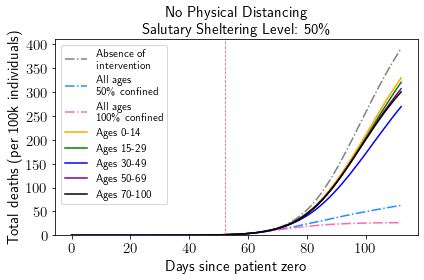

./age_policies/France_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  303.0
Variation in deaths after intervention:  -22.5
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  290.0
Variation in deaths after intervention:  -25.9
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  217.0
Variation in deaths after intervention:  -44.5
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the

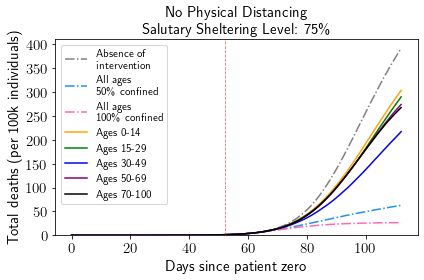

./age_policies/France_nodistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  280.0
Variation in deaths after intervention:  -28.5
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  259.0
Variation in deaths after intervention:  -33.7
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  178.0
Variation in deaths after intervention:  -54.5
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the

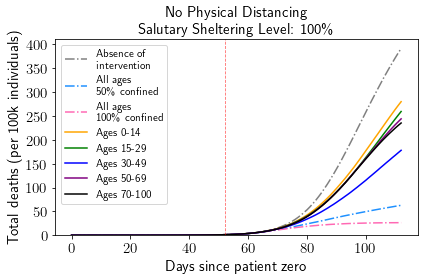

In [18]:
## NUMBER OF DEATHS INDIVIDUALS -- NO PHISICAL DISTANCING -- FRANCE
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'France'
    pop_size = 500000.0
    params_combo = (0.8,0.022,24)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,24),date(2020,3,16),date(2020, 5, 15))
    save_plot = True
    distance_bool = False

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()

./age_policies/France_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  90.0
Variation in deaths after intervention:  -76.9
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  88.0
Variation in deaths after intervention:  -77.5
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  79.0
Variation in deaths after intervention:  -79.9
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the e

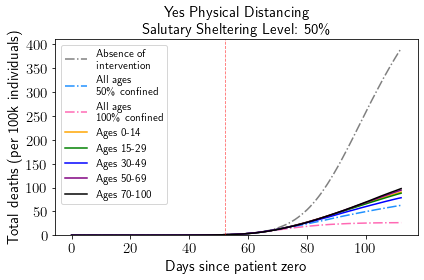

./age_policies/France_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  82.0
Variation in deaths after intervention:  -78.9
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  79.0
Variation in deaths after intervention:  -79.9
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  67.0
Variation in deaths after intervention:  -82.9
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the e

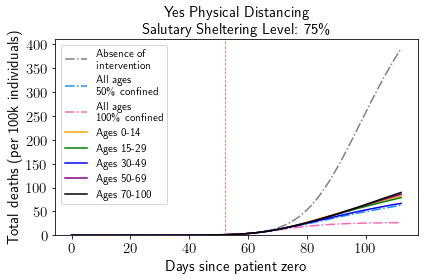

./age_policies/France_yesdistance/
Baseline 0: No intervention
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  391.0
Baseline 1: All Population Isolated by 0.5
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  63.0
Variation in deaths after intervention:  -84.0
Baseline 2: All Population Isolated by 1
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  26.0
Variation in deaths after intervention:  -93.3
Age group:  0-14
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  75.0
Variation in deaths after intervention:  -80.9
Age group:  15-29
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  72.0
Variation in deaths after intervention:  -81.6
Age group:  30-49
# of deaths on lockdown day:  1.0
# of deaths at the end of the simulation:  58.0
Variation in deaths after intervention:  -85.2
Age group:  50-69
# of deaths on lockdown day:  1.0
# of deaths at the e

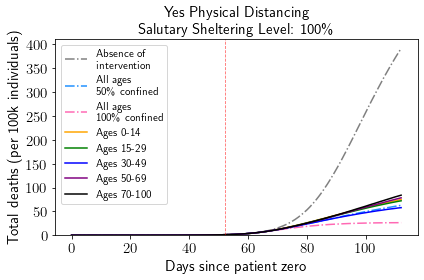

In [19]:
## NUMBER OF DEATHS INDIVIDUALS -- YES PHISICAL DISTANCING -- FRANCE
for fraction_sheltering in [0.5,0.75,1.0]:
    country = 'France'
    pop_size = 500000.0
    params_combo = (0.8,0.022,24)
    fraction_sheltering = fraction_sheltering
    n_sims=100 
    dates = (date(2020,1,24),date(2020,3,16),date(2020, 5, 15))
    save_plot = True
    distance_bool = True

    plt = deaths_age_group_policy(country, pop_size,dates,params_combo,fraction_sheltering,distance_bool = distance_bool,n_sims=100, save_plot = True)
    plt.show()